<a href="https://colab.research.google.com/github/JRKagumba/2D-video-based-running-analysis/blob/main/notebooks/__player_metrics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Drive

In [245]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Import Libraries

In [246]:
import pandas as pd
import numpy as np
# import json
# import os

# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.graph_objects as go
# import plotly.express as px
# import plotly.figure_factory as ff

# from scipy import stats

In [247]:
positions_lst = ["defensive_back","defensive_line","offensive_line","quarterbacks","running_backs","wide_receivers"]
columns_to_plot = ['height_in','weight_lbs','arm_length_in','40_time','age']

### Import DataFrame

In [248]:
player_metrics_file_path = '/content/gdrive/MyDrive/ColabNotebooks/BiomechanicsAnalysis/___40_YARD_DASH/data/40_yard_player_metrics.csv'

player_metrics = pd.read_csv(player_metrics_file_path)

player_metrics[['birth_date','performance_date']] = player_metrics[['birth_date','performance_date']].apply(pd.to_datetime)  #= pd.to_datetime(player_metrics[['birth_date','performance_date']])
player_metrics['age'] = (player_metrics['performance_date'] - player_metrics['birth_date'])/ np.timedelta64(1, 'Y')
player_metrics['position'] = player_metrics['code'].str[:-3]
player_metrics['bmi'] = player_metrics['weight_lbs'] / (player_metrics['height_in']**2)

# player_metrics.to_csv(file_path, index=False)  

In [249]:
player_metrics.tail(3)

,code,name,height_in,weight_lbs,arm_length_in,40_time,birth_date,performance_date,age,position,bmi
147,wide_receivers_23,Miles Boykin,75.75,220,33.50,4.47,1996-10-12,2019-03-02,22.385128,wide_receivers,0.038340
148,wide_receivers_24,AJ Brown,72.50,226,32.88,4.57,1997-06-30,2019-03-02,21.670534,wide_receivers,0.042996
149,wide_receivers_25,Lil'Jordan Humphrey,75.63,210,32.75,4.79,1998-04-19,2019-03-02,20.868327,wide_receivers,0.036714


Text(0, 0.5, 'Density')

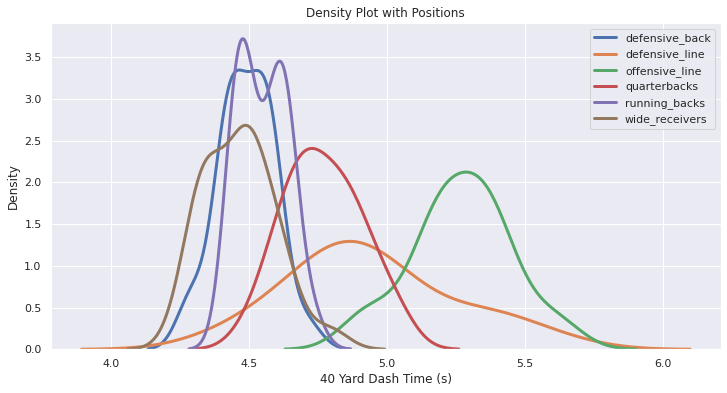

In [250]:
for position in positions_lst:
    # Subset to the position
    subset = player_metrics[player_metrics['position'] == position]
    
    # Draw the density plot
    sns.distplot(subset['40_time'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = position)
    
# Plot formatting
plt.legend()
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Density Plot with Positions')
plt.xlabel('40 Yard Dash Time (s)')
plt.ylabel('Density')

### Plotting Height and Weight

Text(0, 0.5, 'Weight (lbs)')

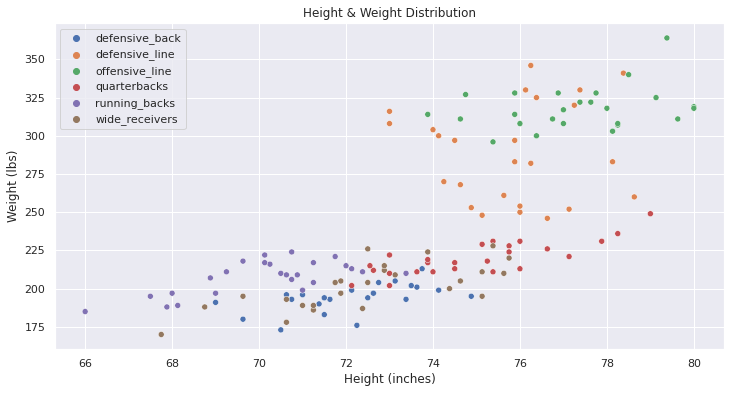

In [251]:
sns.scatterplot(data=player_metrics, x="height_in", y="weight_lbs", hue="position")

# Plot formatting
plt.legend()
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Height & Weight Distribution')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')

### Plotting Age

Text(0, 0.5, 'Density')

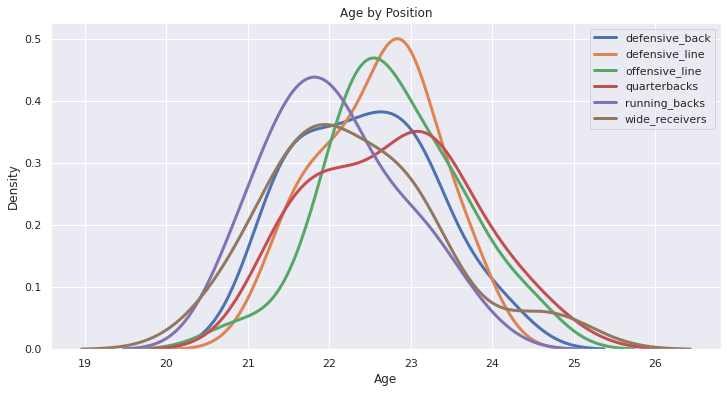

In [252]:
for position in positions_lst:
    # Subset to the position
    subset = player_metrics[player_metrics['position'] == position]
    
    # Draw the density plot
    sns.distplot(subset['age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = position)
    
# Plot formatting
plt.legend()
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Age by Position')
plt.xlabel('Age')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

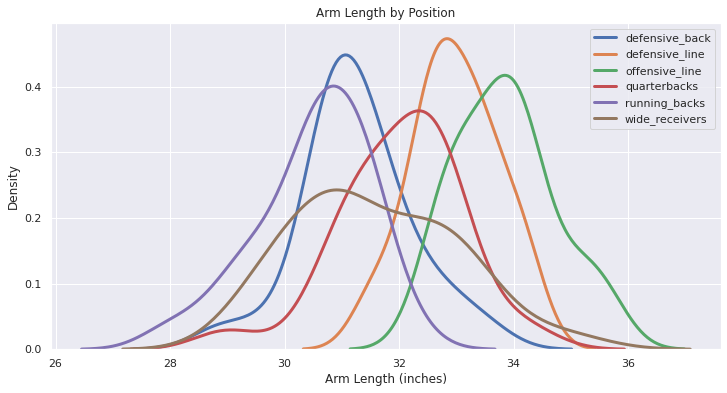

In [253]:
for position in positions_lst:
    # Subset to the position
    subset = player_metrics[player_metrics['position'] == position]
    
    # Draw the density plot
    sns.distplot(subset['arm_length_in'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = position)
    
# Plot formatting
plt.legend()
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Arm Length by Position')
plt.xlabel('Arm Length (inches)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

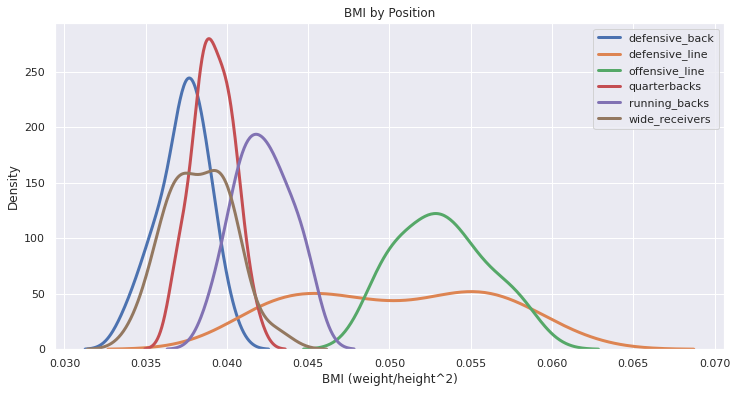

In [254]:
for position in positions_lst:
    # Subset to the position
    subset = player_metrics[player_metrics['position'] == position]
    
    # Draw the density plot
    sns.distplot(subset['bmi'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = position)
    
# Plot formatting
plt.legend()
sns.set(rc={'figure.figsize':(12,6)})
plt.title('BMI by Position')
plt.xlabel('BMI (weight/height^2)')
plt.ylabel('Density')